In [33]:
import os
import pandas as pd
#import datetime
from epiweeks import Week, Year
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pycaret.utils import version
from datetime import datetime

import pandas as pd
import numpy as np
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf

# MLR (temp, month and year)

In [34]:
path1=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\cali_temp_wnv_cases_2.csv'

df=pd.read_csv(path1)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

county_df=df.groupby(['county']).sum()
zero=county_df[county_df['case_count']==0]
zero_list=zero.index.to_list()
zero_list

df2 = df[~df['county'].isin(zero_list)]
df2['county'].value_counts()
df2.head()
df=df2.copy()

df.set_index('mmwr_enddate', inplace=True)
df.index = pd.to_datetime(df.index)

df['month']=df.index.month
df['year']=df.index.year

df.reset_index(inplace=True)
df.drop(columns=['mmwr_enddate'], inplace=True)
df.head()

new=df.groupby(['year','month']).aggregate({'ppt (mm)':'sum','tmean (degrees C)': 'mean','case_count':'sum' })
new.reset_index(inplace=True)
new.head()

df=new.rename(columns={'tmean (degrees C)':'mean_temp', 'ppt (mm)':'percip'})
df.head()

df['mean_temp_shift']=df['mean_temp'].shift(periods=2)
df.head()

#to get rid of NAN
df=df[2:]
df.head()

#Linear Regression
reg = smf.ols('case_count ~ mean_temp_shift + C(month) + C(year)', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     12.30
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           7.26e-27
Time:                        18:34:50   Log-Likelihood:                -898.83
No. Observations:                 188   AIC:                             1854.
Df Residuals:                     160   BIC:                             1944.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.1773     27.870      0.114      0.909     -51.864      58.218
C(month)[T.2]      -9.4593     14.474     -0.654      0.514     -38.045      19.126
C(month)[T.3]      -8.9054     14.409     -0.618      0.537     -37.362      19.551
C(month)[T.4]      -8.5147     12.781     -0.666      0.506     -33.756      16.727
C(month)[T.5]      -8.3804     11.859     -0.707      0.481     -31.800      15.040
C(month)[T.6]      -6.6984     11.404     -0.587      0.558     -29.219      15.823
C(month)[T.7]       0.6493     14.677      0.044      0.965     -28.337      29.636
C(month)[T.8]      55.2340     20.772      2.659      0.009      14.211      96.258
C(month)[T.9]      99.8933     27.459      3.638      0.000      45.664     154.123
C(month)[T.10]     93.1535     27.032      3.446      0.001      39.768     146.539
C(month)[T.11]     37.1381     23.336      1.591      0.113      -8.948      83.225
C(month)[T.12]     24.2951     15.871      1.531      0.128      -7.049      55.639
C(year)[T.2007]     9.6738     13.435      0.720      0.473     -16.859      36.207
C(year)[T.2008]    12.6944     13.441      0.944      0.346     -13.851      39.240
C(year)[T.2009]   -10.6140     13.452     -0.789      0.431     -37.180      15.953
C(year)[T.2010]   -13.0034     13.487     -0.964      0.336     -39.639      13.632
C(year)[T.2011]    -8.4829     13.471     -0.630      0.530     -35.088      18.122
C(year)[T.2012]    17.9494     13.443      1.335      0.184      -8.599      44.498
C(year)[T.2013]     9.6607     13.466      0.717      0.474     -16.934      36.256
C(year)[T.2014]    45.0597     13.776      3.271      0.001      17.854      72.266
C(year)[T.2015]    39.5562     13.952      2.835      0.005      12.002      67.111
C(year)[T.2016]    18.9582     13.504      1.404      0.162      -7.711      45.627
C(year)[T.2017]    24.2365     13.533      1.791      0.075      -2.490      50.963
C(year)[T.2018]    -3.7196     13.587     -0.274      0.785     -30.552      23.113
C(year)[T.2019]    -3.2128     13.445     -0.239      0.811     -29.765      23.340
C(year)[T.2020]    -5.4200     13.661     -0.397      0.692     -32.399      21.559
C(year)[T.2021]   -10.7184     14.244     -0.752      0.453     -38.849      17.412
mean_temp_shift    -0.2348      2.104     -0.112      0.911      -4.390       3.920
==============================================================================
Omnibus:                       40.885   Durbin-Watson:                   0.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.766
Skew:                           0.879   Prob(JB):                     4.41e-26
Kurtosis:                       6.438   Cond. No.                         412.
==============================================================================

Note

# MLR (temp and month)

In [35]:
reg = smf.ols('case_count ~ mean_temp_shift + C(month)', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     19.16
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           4.13e-26
Time:                        18:34:56   Log-Likelihood:                -925.57
No. Observations:                 188   AIC:                             1877.
Df Residuals:                     175   BIC:                             1919.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -40.1616     26.170     -1.535      0.127     -91.810      11.487
C(month)[T.2]       8.2642     15.170      0.545      0.587     -21.676      38.204
C(month)[T.3]       8.6560     15.101      0.573      0.567     -21.147      38.459
C(month)[T.4]       3.1858     13.694      0.233      0.816     -23.840      30.212
C(month)[T.5]      -1.3096     12.908     -0.101      0.919     -26.784      24.165
C(month)[T.6]     -10.6883     12.500     -0.855      0.394     -35.358      13.982
C(month)[T.7]     -18.4767     15.250     -1.212      0.227     -48.575      11.622
C(month)[T.8]      20.0890     20.670      0.972      0.332     -20.706      60.884
C(month)[T.9]      49.6288     26.804      1.852      0.066      -3.272     102.529
C(month)[T.10]     43.8239     26.409      1.659      0.099      -8.296      95.944
C(month)[T.11]     -2.3683     22.971     -0.103      0.918     -47.703      42.967
C(month)[T.12]      3.4124     16.276      0.210      0.834     -28.709      35.534
mean_temp_shift     3.9573      2.003      1.976      0.050       0.005       7.910
==============================================================================
Omnibus:                       72.062   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.065
Skew:                           1.372   Prob(JB):                     4.80e-78
Kurtosis:                       9.159   Cond. No.                         358.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression (temp)

In [24]:
reg = smf.ols('case_count ~ mean_temp_shift', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     163.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           3.21e-27
Time:                        18:28:39   Log-Likelihood:                -945.26
No. Observations:                 188   AIC:                             1895.
Df Residuals:                     186   BIC:                             1901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -54.6368      7.163     -7.627      0.000     -68.769     -40.505
mean_temp_shift     5.7291      0.449     12.769      0.000       4.844       6.614
==============================================================================
Omnibus:                       84.888   Durbin-Watson:                   0.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              367.388
Skew:                           1.734   Prob(JB):                     1.67e-80
Kurtosis:                       8.906   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MLR By Region (temp, month, year)

### Region 1

In [8]:
path1=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\cali_temp_wnv_cases.csv'

df=pd.read_csv(path1)
df.head()
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['season','longitude_west', 'latitude_north','mmwr_enddate','tmin (C)','tmax (C)'], inplace=True)
df.rename(columns={'ppt (mm)':'percip', 'tmean (C)':'mean_temp'}, inplace=True)
df_2=df[df['region']==1]

county_df=df.groupby(['county']).sum()
zero=county_df[county_df['case_count']==0]
zero_list=zero.index.to_list()
zero_list

#Filter out counties with zero cases
df2 = df[~df['county'].isin(zero_list)]
dfr=df2[df2['region']==1]
dfr.head()
df=dfr.drop(columns=['region'])
df.head()

new=df.groupby(['year','month']).aggregate({'percip':'sum','mean_temp': 'mean','case_count':'sum' })
new.reset_index(inplace=True)
new.head()


new['mean_temp_shift']=new['mean_temp'].shift(periods=2)
new.head()

# # #to get rid of NAN
df=new[2:]
df.head()

#Linear regression
reg = smf.ols('case_count ~ mean_temp_shift + C(month) + C(year)', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     7.078
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.76e-16
Time:                        18:18:34   Log-Likelihood:                -853.92
No. Observations:                 188   AIC:                             1764.
Df Residuals:                     160   BIC:                             1854.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.8618     22.579      0.525      0.600     -32.730      56.454
C(month)[T.2]     -12.6801     10.982     -1.155      0.250     -34.369       9.009
C(month)[T.3]     -11.9301     11.013     -1.083      0.280     -33.679       9.819
C(month)[T.4]     -10.6006     10.342     -1.025      0.307     -31.026       9.825
C(month)[T.5]      -8.9183      9.645     -0.925      0.357     -27.966      10.130
C(month)[T.6]      -4.7728      8.871     -0.538      0.591     -22.292      12.746
C(month)[T.7]       0.4962      9.593      0.052      0.959     -18.449      19.442
C(month)[T.8]      26.8616     12.788      2.101      0.037       1.606      52.117
C(month)[T.9]      59.4983     17.094      3.481      0.001      25.739      93.258
C(month)[T.10]     73.8765     17.243      4.285      0.000      39.824     107.929
C(month)[T.11]     36.3060     15.283      2.376      0.019       6.124      66.488
C(month)[T.12]     18.6147     10.948      1.700      0.091      -3.007      40.237
C(year)[T.2007]     7.5448     10.604      0.711      0.478     -13.398      28.488
C(year)[T.2008]    26.2969     10.605      2.480      0.014       5.354      47.240
C(year)[T.2009]     5.1226     10.623      0.482      0.630     -15.857      26.102
C(year)[T.2010]    -0.1651     10.587     -0.016      0.988     -21.074      20.743
C(year)[T.2011]     5.9683     10.578      0.564      0.573     -14.923      26.860
C(year)[T.2012]    20.2085     10.604      1.906      0.058      -0.734      41.151
C(year)[T.2013]    17.5483     10.591      1.657      0.099      -3.367      38.464
C(year)[T.2014]    47.4377     10.770      4.404      0.000      26.167      68.708
C(year)[T.2015]    44.7181     10.748      4.161      0.000      23.492      65.944
C(year)[T.2016]    22.8070     10.611      2.149      0.033       1.851      43.763
C(year)[T.2017]    30.1447     10.632      2.835      0.005       9.147      51.142
C(year)[T.2018]     7.8337     10.727      0.730      0.466     -13.351      29.018
C(year)[T.2019]     4.2520     10.581      0.402      0.688     -16.645      25.149
C(year)[T.2020]     8.9136     10.634      0.838      0.403     -12.088      29.915
C(year)[T.2021]     6.2839     11.178      0.562      0.575     -15.791      28.358
mean_temp_shift    -1.5115      1.372     -1.102      0.272      -4.221       1.198
==============================================================================
Omnibus:                       76.075   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.492
Skew:                           1.506   Prob(JB):                     1.16e-74
Kurtosis:                       8.865   Cond. No.                         376.
==============================================================================

Note

### Region 2

In [9]:
path1=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\cali_temp_wnv_cases.csv'

df=pd.read_csv(path1)
df.head()
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['season','longitude_west', 'latitude_north','mmwr_enddate','tmin (C)','tmax (C)'], inplace=True)
df.rename(columns={'ppt (mm)':'percip', 'tmean (C)':'mean_temp'}, inplace=True)
df_2=df[df['region']==1]

county_df=df.groupby(['county']).sum()
zero=county_df[county_df['case_count']==0]
zero_list=zero.index.to_list()
zero_list

#Filter out counties with zero cases
df2 = df[~df['county'].isin(zero_list)]
dfr=df2[df2['region']==2]
dfr.head()
df=dfr.drop(columns=['region'])
df.head()

new=df.groupby(['year','month']).aggregate({'percip':'sum','mean_temp': 'mean','case_count':'sum' })
new.reset_index(inplace=True)
new.head()


new['mean_temp_shift']=new['mean_temp'].shift(periods=2)
new.head()

# # #to get rid of NAN
df=new[2:]
df.head()

#Linear Regression
reg = smf.ols('case_count ~ mean_temp_shift + C(month) + C(year)', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     7.387
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           5.35e-17
Time:                        18:18:38   Log-Likelihood:                -588.55
No. Observations:                 188   AIC:                             1233.
Df Residuals:                     160   BIC:                             1324.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.5084      5.644     -0.267      0.790     -12.656       9.639
C(month)[T.2]      -0.0808      2.765     -0.029      0.977      -5.541       5.379
C(month)[T.3]      -0.0955      2.770     -0.034      0.973      -5.567       5.376
C(month)[T.4]      -0.3850      2.445     -0.157      0.875      -5.215       4.445
C(month)[T.5]      -0.9401      2.226     -0.422      0.673      -5.336       3.456
C(month)[T.6]      -1.1902      2.225     -0.535      0.594      -5.585       3.205
C(month)[T.7]       0.2260      2.933      0.077      0.939      -5.566       6.018
C(month)[T.8]       5.7391      4.166      1.377      0.170      -2.489      13.967
C(month)[T.9]      10.4095      5.535      1.881      0.062      -0.522      21.341
C(month)[T.10]      9.4467      5.405      1.748      0.082      -1.227      20.121
C(month)[T.11]      1.7037      4.603      0.370      0.712      -7.388      10.795
C(month)[T.12]      3.2458      3.067      1.058      0.292      -2.811       9.303
C(year)[T.2007]     7.9596      2.579      3.086      0.002       2.866      13.054
C(year)[T.2008]    -2.4826      2.581     -0.962      0.338      -7.579       2.614
C(year)[T.2009]    -2.3411      2.582     -0.907      0.366      -7.441       2.759
C(year)[T.2010]    -2.5982      2.586     -1.005      0.317      -7.705       2.508
C(year)[T.2011]    -2.2422      2.581     -0.869      0.386      -7.339       2.854
C(year)[T.2012]     0.0976      2.589      0.038      0.970      -5.015       5.210
C(year)[T.2013]    -1.8882      2.600     -0.726      0.469      -7.022       3.246
C(year)[T.2014]    -1.1478      2.672     -0.430      0.668      -6.425       4.129
C(year)[T.2015]     0.1979      2.700      0.073      0.942      -5.135       5.531
C(year)[T.2016]    -1.7173      2.599     -0.661      0.510      -6.850       3.415
C(year)[T.2017]     2.9464      2.617      1.126      0.262      -2.222       8.115
C(year)[T.2018]    -3.1927      2.632     -1.213      0.227      -8.391       2.005
C(year)[T.2019]    -0.1867      2.584     -0.072      0.942      -5.289       4.916
C(year)[T.2020]    -4.3072      2.618     -1.645      0.102      -9.478       0.863
C(year)[T.2021]    -4.0753      2.744     -1.485      0.139      -9.494       1.343
mean_temp_shift     0.2775      0.394      0.704      0.482      -0.501       1.056
==============================================================================
Omnibus:                      109.347   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.578
Skew:                           2.018   Prob(JB):                    1.29e-210
Kurtosis:                      13.349   Cond. No.                         477.
==============================================================================

Note

### Region 3

In [107]:
path1=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\cali_temp_wnv_cases.csv'

df=pd.read_csv(path1)
df.head()
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['season','longitude_west', 'latitude_north','mmwr_enddate','tmin (C)','tmax (C)'], inplace=True)
df.rename(columns={'ppt (mm)':'percip', 'tmean (C)':'mean_temp'}, inplace=True)
df_2=df[df['region']==1]

county_df=df.groupby(['county']).sum()
zero=county_df[county_df['case_count']==0]
zero_list=zero.index.to_list()
zero_list

#Filter out counties with zero cases
df2 = df[~df['county'].isin(zero_list)]

#Filter Region
dfr=df2[df2['region']==3]
dfr.head()
df=dfr.drop(columns=['region'])
df.head()

new=df.groupby(['year','month']).aggregate({'percip':'sum','mean_temp': 'mean','case_count':'sum' })
new.reset_index(inplace=True)
new.head()


new['mean_temp_shift']=new['mean_temp'].shift(periods=2)
new.head()

# # #to get rid of NAN
df=new[2:]
df.head()

#Linear Regression Fit
reg = smf.ols('case_count ~ mean_temp_shift+ C(month) + C(year)', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     17.51
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           4.63e-35
Time:                        17:39:56   Log-Likelihood:                -575.97
No. Observations:                 188   AIC:                             1208.
Df Residuals:                     160   BIC:                             1299.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7845      5.156      0.346      0.730      -8.397      11.966
C(month)[T.2]      -0.6419      2.632     -0.244      0.808      -5.840       4.556
C(month)[T.3]      -0.6982      2.637     -0.265      0.792      -5.906       4.510
C(month)[T.4]      -0.9712      2.288     -0.425      0.672      -5.489       3.547
C(month)[T.5]      -1.1222      2.116     -0.530      0.597      -5.300       3.056
C(month)[T.6]      -1.2051      2.053     -0.587      0.558      -5.259       2.849
C(month)[T.7]       0.7098      2.654      0.268      0.789      -4.531       5.950
C(month)[T.8]      16.2331      3.725      4.358      0.000       8.876      23.590
C(month)[T.9]      22.8232      4.789      4.766      0.000      13.366      32.280
C(month)[T.10]     13.7295      4.705      2.918      0.004       4.438      23.021
C(month)[T.11]      5.0091      4.160      1.204      0.230      -3.207      13.225
C(month)[T.12]      4.6752      2.897      1.614      0.109      -1.047      10.397
C(year)[T.2007]    -1.0535      2.412     -0.437      0.663      -5.816       3.709
C(year)[T.2008]    -4.0659      2.413     -1.685      0.094      -8.830       0.699
C(year)[T.2009]    -4.9884      2.413     -2.067      0.040      -9.754      -0.223
C(year)[T.2010]    -2.9564      2.424     -1.220      0.224      -7.743       1.830
C(year)[T.2011]    -5.0448      2.422     -2.083      0.039      -9.829      -0.261
C(year)[T.2012]     2.0314      2.412      0.842      0.401      -2.731       6.794
C(year)[T.2013]    -3.3409      2.416     -1.383      0.169      -8.112       1.431
C(year)[T.2014]     2.4495      2.468      0.993      0.322      -2.424       7.323
C(year)[T.2015]    -4.7765      2.511     -1.902      0.059      -9.735       0.182
C(year)[T.2016]     0.6198      2.426      0.255      0.799      -4.172       5.411
C(year)[T.2017]    -1.2323      2.433     -0.507      0.613      -6.037       3.572
C(year)[T.2018]    -1.8193      2.434     -0.747      0.456      -6.627       2.988
C(year)[T.2019]    -0.6078      2.420     -0.251      0.802      -5.386       4.171
C(year)[T.2020]    -2.7185      2.469     -1.101      0.272      -7.594       2.157
C(year)[T.2021]    -5.6445      2.554     -2.210      0.029     -10.689      -0.600
mean_temp_shift     0.1357      0.401      0.338      0.736      -0.657       0.928
==============================================================================
Omnibus:                       35.854   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.448
Skew:                           0.781   Prob(JB):                     6.91e-22
Kurtosis:                       6.162   Cond. No.                         393.
==============================================================================

Note

### Region 4

In [105]:
path1=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\cali_temp_wnv_cases.csv'

df=pd.read_csv(path1)
df.head()
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['season','longitude_west', 'latitude_north','mmwr_enddate','tmin (C)','tmax (C)'], inplace=True)
df.rename(columns={'ppt (mm)':'percip', 'tmean (C)':'mean_temp'}, inplace=True)
df_2=df[df['region']==4]

county_df=df.groupby(['county']).sum()
zero=county_df[county_df['case_count']==0]
zero_list=zero.index.to_list()
zero_list

#Filter out counties with zero cases
df2 = df[~df['county'].isin(zero_list)]
dfr=df2[df2['region']==4]
dfr.head()
df=dfr.drop(columns=['region'])
df.head()

new=df.groupby(['year','month']).aggregate({'percip':'sum','mean_temp': 'mean','case_count':'sum' })
new.reset_index(inplace=True)
new.head()


new['mean_temp_shift']=new['mean_temp'].shift(periods=2)
new.head()

# # #to get rid of NAN
df=new[2:]
df.head()

#Linear Regression Fit
reg = smf.ols('case_count ~ mean_temp_shift + C(month) + C(year)', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     5.440
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.75e-12
Time:                        17:39:23   Log-Likelihood:                -595.63
No. Observations:                 188   AIC:                             1247.
Df Residuals:                     160   BIC:                             1338.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.5887      5.002     -0.518      0.606     -12.468       7.290
C(month)[T.2]       2.5412      2.783      0.913      0.363      -2.954       8.037
C(month)[T.3]       2.1667      2.729      0.794      0.428      -3.222       7.556
C(month)[T.4]       1.2658      2.473      0.512      0.609      -3.618       6.149
C(month)[T.5]       0.7164      2.358      0.304      0.762      -3.941       5.374
C(month)[T.6]      -1.2210      2.276     -0.537      0.592      -5.715       3.273
C(month)[T.7]      -3.3427      2.993     -1.117      0.266      -9.253       2.568
C(month)[T.8]       4.4539      4.206      1.059      0.291      -3.852      12.760
C(month)[T.9]       5.7055      5.529      1.032      0.304      -5.213      16.624
C(month)[T.10]     -4.3050      5.404     -0.797      0.427     -14.978       6.368
C(month)[T.11]     -5.7433      4.605     -1.247      0.214     -14.839       3.352
C(month)[T.12]     -2.6724      3.152     -0.848      0.398      -8.897       3.552
C(year)[T.2007]    -4.2942      2.678     -1.604      0.111      -9.582       0.994
C(year)[T.2008]    -6.1116      2.680     -2.280      0.024     -11.405      -0.818
C(year)[T.2009]    -7.2192      2.681     -2.693      0.008     -12.514      -1.924
C(year)[T.2010]    -6.4070      2.691     -2.381      0.018     -11.721      -1.093
C(year)[T.2011]    -6.1284      2.688     -2.280      0.024     -11.436      -0.821
C(year)[T.2012]    -3.4928      2.679     -1.304      0.194      -8.784       1.799
C(year)[T.2013]    -2.3825      2.684     -0.888      0.376      -7.683       2.918
C(year)[T.2014]    -3.0666      2.740     -1.119      0.265      -8.477       2.344
C(year)[T.2015]    -0.7016      2.769     -0.253      0.800      -6.169       4.766
C(year)[T.2016]    -2.1867      2.686     -0.814      0.417      -7.492       3.119
C(year)[T.2017]    -7.0007      2.690     -2.603      0.010     -12.312      -1.689
C(year)[T.2018]    -5.4803      2.699     -2.031      0.044     -10.810      -0.150
C(year)[T.2019]    -6.8544      2.678     -2.559      0.011     -12.144      -1.565
C(year)[T.2020]    -7.3352      2.723     -2.694      0.008     -12.713      -1.958
C(year)[T.2021]    -6.7477      2.845     -2.372      0.019     -12.366      -1.130
mean_temp_shift     0.6698      0.382      1.754      0.081      -0.084       1.424
==============================================================================
Omnibus:                      188.985   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6223.927
Skew:                           3.684   Prob(JB):                         0.00
Kurtosis:                      30.208   Cond. No.                         407.
==============================================================================

Note

### Region 5

In [111]:
path1=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\cali_temp_wnv_cases.csv'

df=pd.read_csv(path1)
df.head()
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['season','longitude_west', 'latitude_north','mmwr_enddate','tmin (C)','tmax (C)'], inplace=True)
df.rename(columns={'ppt (mm)':'percip', 'tmean (C)':'mean_temp'}, inplace=True)
df_2=df[df['region']==5]

county_df=df.groupby(['county']).sum()
zero=county_df[county_df['case_count']==0]
zero_list=zero.index.to_list()
zero_list

#Filter out counties with zero cases
df2 = df[~df['county'].isin(zero_list)]
dfr=df2[df2['region']==5]
dfr.head()
df=dfr.drop(columns=['region'])
df.head()

new=df.groupby(['year','month']).aggregate({'percip':'sum','mean_temp': 'mean','case_count':'sum' })
new.reset_index(inplace=True)
new.head()


new['mean_temp_shift']=new['mean_temp'].shift(periods=2)
new.head()

# # #to get rid of NAN
df=new[2:]
df.head()

#Linear Regression Fit
reg = smf.ols('case_count ~ mean_temp_shift + C(month) + C(year)', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     2.102
Date:                Tue, 15 Feb 2022   Prob (F-statistic):            0.00249
Time:                        17:43:34   Log-Likelihood:                -156.19
No. Observations:                 188   AIC:                             368.4
Df Residuals:                     160   BIC:                             459.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2718      0.381      0.713      0.477      -0.481       1.025
C(month)[T.2]       0.0821      0.268      0.307      0.759      -0.446       0.611
C(month)[T.3]       0.0532      0.263      0.203      0.840      -0.465       0.572
C(month)[T.4]       0.0274      0.239      0.115      0.909      -0.444       0.499
C(month)[T.5]       0.0074      0.226      0.033      0.974      -0.438       0.453
C(month)[T.6]      -0.0491      0.221     -0.223      0.824      -0.485       0.387
C(month)[T.7]      -0.0024      0.286     -0.008      0.993      -0.568       0.563
C(month)[T.8]       0.1725      0.392      0.440      0.661      -0.602       0.947
C(month)[T.9]       0.5799      0.544      1.067      0.288      -0.494       1.654
C(month)[T.10]      0.1443      0.540      0.267      0.790      -0.923       1.212
C(month)[T.11]     -0.1060      0.443     -0.239      0.811      -0.981       0.769
C(month)[T.12]     -0.0678      0.291     -0.233      0.816      -0.642       0.507
C(year)[T.2007]     0.1786      0.259      0.691      0.491      -0.332       0.689
C(year)[T.2008]    -0.4844      0.259     -1.873      0.063      -0.995       0.026
C(year)[T.2009]    -0.5788      0.259     -2.235      0.027      -1.090      -0.067
C(year)[T.2010]    -0.5591      0.259     -2.155      0.033      -1.072      -0.047
C(year)[T.2011]    -0.5586      0.260     -2.152      0.033      -1.071      -0.046
C(year)[T.2012]    -0.4922      0.259     -1.903      0.059      -1.003       0.019
C(year)[T.2013]    -0.4099      0.259     -1.584      0.115      -0.921       0.101
C(year)[T.2014]    -0.4321      0.264     -1.639      0.103      -0.953       0.088
C(year)[T.2015]    -0.2781      0.269     -1.033      0.303      -0.810       0.253
C(year)[T.2016]    -0.5013      0.260     -1.930      0.055      -1.014       0.012
C(year)[T.2017]    -0.4954      0.259     -1.913      0.057      -1.007       0.016
C(year)[T.2018]    -0.4203      0.260     -1.615      0.108      -0.934       0.094
C(year)[T.2019]    -0.5718      0.259     -2.212      0.028      -1.082      -0.061
C(year)[T.2020]    -0.4203      0.260     -1.615      0.108      -0.934       0.094
C(year)[T.2021]    -0.5014      0.272     -1.840      0.068      -1.039       0.037
mean_temp_shift     0.0191      0.036      0.538      0.591      -0.051       0.089
==============================================================================
Omnibus:                      249.366   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21364.221
Skew:                           5.402   Prob(JB):                         0.00
Kurtosis:                      54.094   Cond. No.                         332.
==============================================================================

Note

In [100]:
reg = smf.ols('case_count ~ mean_temp_shift + C(month)', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     19.16
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           4.13e-26
Time:                        17:35:55   Log-Likelihood:                -925.57
No. Observations:                 188   AIC:                             1877.
Df Residuals:                     175   BIC:                             1919.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -40.1616     26.170     -1.535      0.127     -91.810      11.487
C(month)[T.2]       8.2642     15.170      0.545      0.587     -21.676      38.204
C(month)[T.3]       8.6560     15.101      0.573      0.567     -21.147      38.459
C(month)[T.4]       3.1858     13.694      0.233      0.816     -23.840      30.212
C(month)[T.5]      -1.3096     12.908     -0.101      0.919     -26.784      24.165
C(month)[T.6]     -10.6883     12.500     -0.855      0.394     -35.358      13.982
C(month)[T.7]     -18.4767     15.250     -1.212      0.227     -48.575      11.622
C(month)[T.8]      20.0890     20.670      0.972      0.332     -20.706      60.884
C(month)[T.9]      49.6288     26.804      1.852      0.066      -3.272     102.529
C(month)[T.10]     43.8239     26.409      1.659      0.099      -8.296      95.944
C(month)[T.11]     -2.3683     22.971     -0.103      0.918     -47.703      42.967
C(month)[T.12]      3.4124     16.276      0.210      0.834     -28.709      35.534
mean_temp_shift     3.9573      2.003      1.976      0.050       0.005       7.910
==============================================================================
Omnibus:                       72.062   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.065
Skew:                           1.372   Prob(JB):                     4.80e-78
Kurtosis:                       9.159   Cond. No.                         358.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
reg = smf.ols('case_count ~ mean_temp_shift', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     160.9
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           5.66e-27
Time:                        17:40:43   Log-Likelihood:                -945.83
No. Observations:                 188   AIC:                             1896.
Df Residuals:                     186   BIC:                             1902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -59.3665      7.553     -7.860      0.000     -74.267     -44.466
mean_temp_shift     5.7640      0.454     12.686      0.000       4.868       6.660
==============================================================================
Omnibus:                       85.329   Durbin-Watson:                   0.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.166
Skew:                           1.746   Prob(JB):                     1.13e-80
Kurtosis:                       8.899   Cond. No.                         46.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MLR (temp, month, year, and region)

In [116]:
path1=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\cali_temp_wnv_cases.csv'

df=pd.read_csv(path1)
df.head()
df.drop(columns=['Unnamed: 0', 'county'], inplace=True)
df.drop(columns=['season','longitude_west', 'latitude_north','mmwr_enddate','tmin (C)','tmax (C)'], inplace=True)
df.rename(columns={'ppt (mm)':'percip', 'tmean (C)':'mean_temp'}, inplace=True)

new=df.groupby(['year','month','region']).aggregate({'percip':'sum','mean_temp': 'mean','case_count':'sum' })
new.reset_index(inplace=True)

new.head()

new['temp_mean_shift']=new['mean_temp'].shift(periods=2)
df=new[2:]

reg = smf.ols('case_count ~ temp_mean_shift + C(region) + C(year) + C(month)', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     15.32
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.17e-63
Time:                        18:03:18   Log-Likelihood:                -3848.9
No. Observations:                 948   AIC:                             7762.
Df Residuals:                     916   BIC:                             7917.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7070      3.003      0.568      0.570      -4.186       7.600
C(region)[T.2]     -6.9096      1.610     -4.293      0.000     -10.068      -3.751
C(region)[T.3]    -12.9350      1.646     -7.858      0.000     -16.165      -9.705
C(region)[T.4]    -16.0416      1.607     -9.981      0.000     -19.196     -12.887
C(region)[T.5]    -15.4024      1.467    -10.500      0.000     -18.281     -12.524
C(year)[T.2007]     1.3566      2.629      0.516      0.606      -3.803       6.516
C(year)[T.2008]     2.0071      2.629      0.764      0.445      -3.152       7.166
C(year)[T.2009]    -2.6628      2.629     -1.013      0.311      -7.822       2.496
C(year)[T.2010]    -2.0926      2.632     -0.795      0.427      -7.258       3.073
C(year)[T.2011]    -1.0671      2.633     -0.405      0.685      -6.235       4.100
C(year)[T.2012]     2.5179      2.632      0.957      0.339      -2.648       7.684
C(year)[T.2013]     1.2053      2.630      0.458      0.647      -3.955       6.366
C(year)[T.2014]     6.4770      2.657      2.438      0.015       1.263      11.691
C(year)[T.2015]     5.7349      2.648      2.166      0.031       0.538      10.932
C(year)[T.2016]     2.3802      2.636      0.903      0.367      -2.792       7.553
C(year)[T.2017]     3.5361      2.634      1.342      0.180      -1.634       8.706
C(year)[T.2018]    -2.3952      2.639     -0.908      0.364      -7.574       2.784
C(year)[T.2019]    -0.9273      2.628     -0.353      0.724      -6.086       4.231
C(year)[T.2020]    -2.7182      2.638     -1.030      0.303      -7.896       2.460
C(year)[T.2021]    -4.0241      2.777     -1.449      0.148      -9.474       1.426
C(month)[T.2]      -2.7623      2.279     -1.212      0.226      -7.235       1.710
C(month)[T.3]      -4.3055      2.318     -1.858      0.064      -8.854       0.243
C(month)[T.4]      -6.6774      2.437     -2.740      0.006     -11.460      -1.895
C(month)[T.5]     -10.8259      2.784     -3.889      0.000     -16.290      -5.362
C(month)[T.6]     -15.8158      3.398     -4.654      0.000     -22.485      -9.146
C(month)[T.7]     -19.4923      4.094     -4.762      0.000     -27.526     -11.458
C(month)[T.8]     -11.0298      4.433     -2.488      0.013     -19.730      -2.330
C(month)[T.9]      -0.7383      4.204     -0.176      0.861      -8.988       7.512
C(month)[T.10]      2.8297      3.507      0.807      0.420      -4.053       9.712
C(month)[T.11]     -1.6973      2.762     -0.615      0.539      -7.118       3.723
C(month)[T.12]      2.1200      2.350      0.902      0.367      -2.492       6.733
temp_mean_shift     1.3014      0.230      5.669      0.000       0.851       1.752
==============================================================================
Omnibus:                     1073.874   Durbin-Watson:          

# MLR with county

In [38]:
path1=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\cali_temp_wnv_cases.csv'

df=pd.read_csv(path1)
df.head()
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['season','longitude_west', 'latitude_north','mmwr_enddate','tmin (C)','tmax (C)'], inplace=True)
df.rename(columns={'ppt (mm)':'percip', 'tmean (C)':'mean_temp'}, inplace=True)

df.head()

county_df=df.groupby(['county']).sum()
zero=county_df[county_df['case_count']==0]
zero_list=zero.index.to_list()
zero_list

#Filter out counties with zero cases
df2 = df[~df['county'].isin(zero_list)]

new=df2.groupby(['year','month','county']).aggregate({'mean_temp': 'mean','case_count':'sum' })
new.reset_index(inplace=True)
new.head()

,year,month,county,mean_temp,case_count
0,2006,1,alameda,9.139286,0.0
1,2006,1,amador,8.300000,0.0
2,2006,1,butte,9.721429,0.0
3,2006,1,calaveras,8.117857,0.0
4,2006,1,colusa,9.350000,0.0


In [42]:
new['mean_temp_shift']=new['mean_temp'].shift(periods=2)
new.head()

# # #to get rid of NAN
df=new[2:]
df.head()

#Linear Regression
reg = smf.ols('case_count ~ mean_temp_shift + C(month) + C(year) + C(county)  ', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     32.39
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:20:10   Log-Likelihood:                -24854.
No. Observations:                9308   AIC:                         4.983e+04
Df Residuals:                    9247   BIC:                         5.026e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.2272      0.327     -0.694      0.488      -0.869       0.414
C(month)[T.2]                   -0.1365      0.179     -0.764      0.445      -0.487       0.214
C(month)[T.3]                   -0.1140      0.182     -0.626      0.532      -0.471       0.243
C(month)[T.4]                   -0.0642      0.198     -0.325      0.745      -0.452       0.323
C(month)[T.5]                    0.0002      0.232      0.001      0.999      -0.455       0.455
C(month)[T.6]                    0.0938      0.280      0.335      0.738      -0.455       0.642
C(month)[T.7]                    0.2948      0.331      0.889      0.374      -0.355       0.945
C(month)[T.8]                    1.3888      0.330      4.206      0.000       0.742       2.036
C(month)[T.9]                    2.2474      0.303      7.421      0.000       1.654       2.841
C(month)[T.10]                   2.0289      0.245      8.278      0.000       1.548       2.509
C(month)[T.11]                   0.8236      0.197      4.186      0.000       0.438       1.209
C(month)[T.12]                   0.5022      0.180      2.787      0.005       0.149       0.855
C(county)[T.amador]             -0.0258      0.361     -0.072      0.943      -0.733       0.681
C(county)[T.butte]               1.1288      0.361      3.124      0.002       0.420       1.837
C(county)[T.calaveras]          -0.0704      0.362     -0.195      0.846      -0.779       0.639
C(county)[T.colusa]              0.0563      0.360      0.156      0.876      -0.650       0.762
C(county)[T.contra_costa]        0.2473      0.361      0.685      0.494      -0.461       0.955
C(county)[T.el_dorado]          -0.0016      0.360     -0.004      0.997      -0.708       0.705
C(county)[T.fresno]              1.3033      0.363      3.593      0.000       0.592       2.014
C(county)[T.glenn]               0.3159      0.364      0.867      0.386      -0.399       1.030
C(county)[T.humboldt]           -0.0142      0.361     -0.039      0.969      -0.721       0.693
C(county)[T.imperial]            0.0304      0.360      0.084      0.933      -0.676       0.736
C(county)[T.inyo]               -0.0979      0.368     -0.266      0.790      -0.818       0.623
C(county)[T.kern]                2.2376      0.373      6.000      0.000       1.507       2.969
C(county)[T.kings]               0.1496      0.361      0.414      0.679      -0.559       0.858
C(county)[T.lake]                0.0353      0.361      0.098      0.922      -0.672       0.743
C(county)[T.los_angeles]         9.1607      0.360     25.422      0.000       8.454       9.867
C(county)[T.madera]              0.1776      0.362      0.490      0.624      -0.532       0.887
C(county)[T.marin]              -0.0590      0.362     -0.163      0.871    

# LR (temp) Analysis

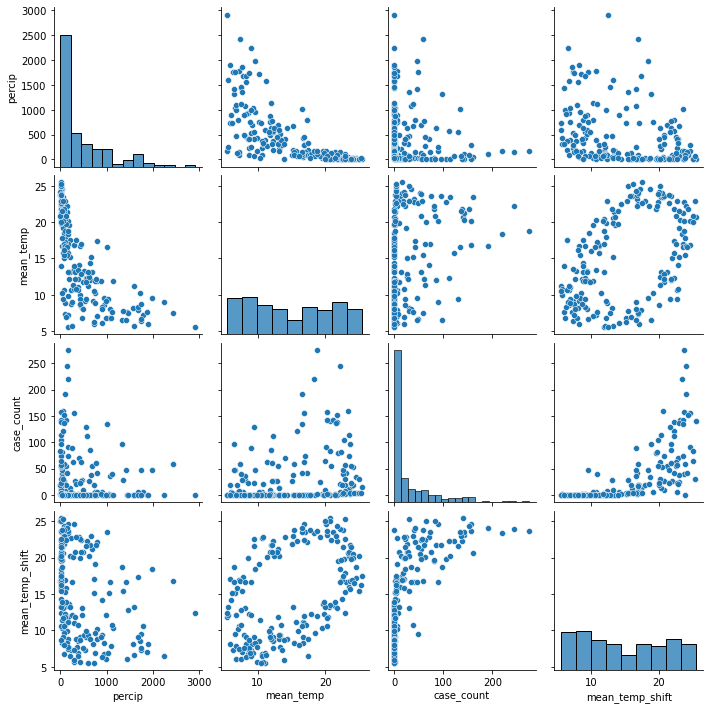

In [25]:
#See githib for "cali_temp_wnv_cases_2.csv"
path1=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\cali_temp_wnv_cases_2.csv'

df=pd.read_csv(path1)
df.head()
df.drop(columns=['Unnamed: 0', 'county'], inplace=True)

df.set_index('mmwr_enddate', inplace=True)
df.index = pd.to_datetime(df.index)

df['month']=df.index.month
df['year']=df.index.year

df.reset_index(inplace=True)
df.drop(columns=['mmwr_enddate'], inplace=True)
df.head()

new=df.groupby(['year','month']).aggregate({'ppt (mm)':'sum','tmean (degrees C)': 'mean','case_count':'sum' })
new.reset_index(inplace=True)
new.head()
new['day']="1"
new["month_date"] = pd.to_datetime(new[['month', 'day', 'year']])
new.head()

df=new.drop(columns=['year', 'month', 'day'])
df.set_index('month_date', inplace=True)
df.rename(columns={'tmean (degrees C)':'mean_temp', 'ppt (mm)':'percip'}, inplace=True)
df.tail()

df['mean_temp_shift']=df['mean_temp'].shift(periods=2)
df.head()

df=df[2:]
df.head()

sns.pairplot(df)

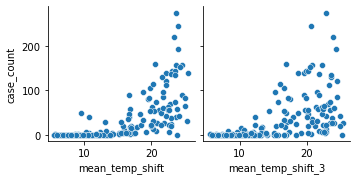

In [106]:
sns.pairplot(df, x_vars=['mean_temp_shift', 'mean_temp_shift_3'], y_vars='case_count')

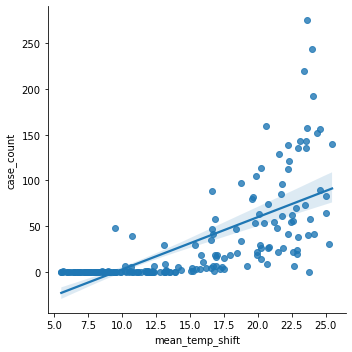

In [26]:
sns.lmplot(x ="mean_temp_shift", 
y = "case_count", data = df)

In [30]:
reg = smf.ols('case_count ~ mean_temp_shift', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     163.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           3.21e-27
Time:                        18:32:04   Log-Likelihood:                -945.26
No. Observations:                 188   AIC:                             1895.
Df Residuals:                     186   BIC:                             1901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -54.6368      7.163     -7.627      0.000     -68.769     -40.505
mean_temp_shift     5.7291      0.449     12.769      0.000       4.844       6.614
==============================================================================
Omnibus:                       84.888   Durbin-Watson:                   0.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              367.388
Skew:                           1.734   Prob(JB):                     1.67e-80
Kurtosis:                       8.906   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
def predict(mean_temp):
    result=(5.7291*(mean_temp))-54.6368
    return int(result)
    
predict(10)

2

(array([ 2.,  8., 27., 46., 49., 33.,  4., 10.,  4.,  1.,  1.,  0.,  1.,
         1.,  1.]),
 array([-81.61430786, -63.22544295, -44.83657805, -26.44771315,
         -8.05884824,  10.33001666,  28.71888157,  47.10774647,
         65.49661138,  83.88547628, 102.27434118, 120.66320609,
        139.05207099, 157.4409359 , 175.8298008 , 194.2186657 ]),
 <BarContainer object of 15 artists>)

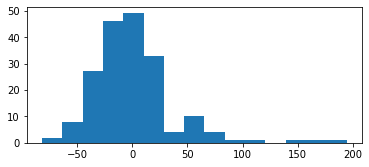

In [32]:
#Linearity & Equal variance

pred_val = reg.fittedvalues.copy()
true_val = df['case_count'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6,2.5))
ax.hist(residual, bins=15)
#want it to be reasonably random